In [1]:
from astropy.io import fits as pyfits, ascii as asc
from astropy.table import Table
from create_ordered_AP_arrays import create_ordered_AP_arrays
import numpy as np, matplotlib.pyplot as plt
import plotting.general_plotting as general_plotting
import plotting_NII_Ha_ratios

from analysis.cardelli import *
from astropy.cosmology import FlatLambdaCDM
from scipy import stats
from scipy.interpolate import interp1d
cosmo = FlatLambdaCDM(H0 = 70 * u.km / u.s / u.Mpc, Om0=0.3)


FULL_PATH = '/Users/kaitlynshin/GoogleDrive/NASA_Summer2015/'

## plotting M* vs EBV?

In [2]:
corr_tbl = asc.read(FULL_PATH+'Main_Sequence/mainseq_corrections_tbl.txt',guess=False,
                    Reader=asc.FixedWidthTwoLine)

In [3]:
ebv00 = np.array(corr_tbl['EBV'])
mstar00 = np.array(corr_tbl['stlr_mass'])

gg = np.where(ebv00 > 0)[0]

ebv01 = ebv00[gg]
mstar01 = mstar00[gg]
zspec01 = np.array(corr_tbl['zspec0'])[gg]

zz = np.array([x for x in range(len(zspec01)) if zspec01[x] > 0 and zspec01[x] < 9])

ebv02 = ebv01[zz]
mstar02 = mstar01[zz]
zspec02 = zspec01[zz]
filt02 = np.array(corr_tbl['filt'][gg][zz])

In [4]:
aa = np.where((corr_tbl['filt']=='NB704') & (corr_tbl['zspec0'] > 0) & (corr_tbl['zspec0'] < 9))[0]
bb = np.where((corr_tbl['filt']=='NB711') & (corr_tbl['zspec0'] > 0) & (corr_tbl['zspec0'] < 9))[0]
cc = np.where((corr_tbl['filt']=='NB816') & (corr_tbl['zspec0'] > 0) & (corr_tbl['zspec0'] < 9))[0]
dd = np.where((corr_tbl['filt']=='NB921') & (corr_tbl['zspec0'] > 0) & (corr_tbl['zspec0'] < 9))[0]
ee = np.where((corr_tbl['filt']=='NB973') & (corr_tbl['zspec0'] > 0) & (corr_tbl['zspec0'] < 9))[0]

In [5]:
nb704 = np.where(filt02=='NB704')[0]
nb711 = np.where(filt02=='NB711')[0]
nb816 = np.where(filt02=='NB816')[0]
nb921 = np.where(filt02=='NB921')[0]
nb973 = np.where(filt02=='NB973')[0]

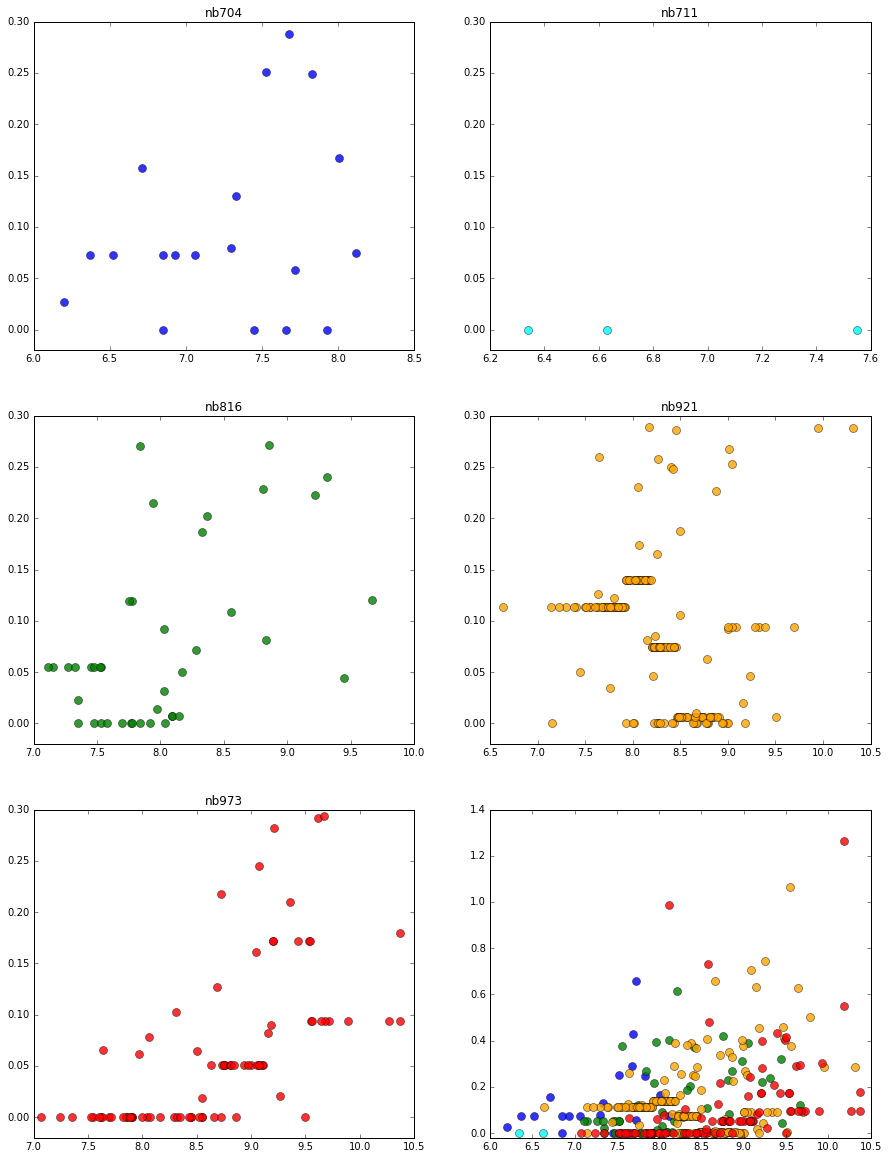

In [6]:
f, axes = plt.subplots(3,2)
f.set_size_inches(15,20)

axarr = np.ndarray.flatten(axes)

for ax, ii, lab, color in zip(axarr, [aa,bb,cc,dd,ee], 
                         ['nb704','nb711','nb816','nb921','nb973'], ['blue','cyan','green','orange','red']):
    ax.plot(mstar00[ii], ebv00[ii], color, marker='o', ls='None', label=lab, alpha=0.8, markersize=8)
    ax.set_ylim([-0.02, 0.3])
    ax.set_title(lab)
    
axarr[-1].plot(mstar00[aa], ebv00[aa], 'blue', marker='o', ls='None', label='nb704', alpha=0.8, markersize=8)
axarr[-1].plot(mstar00[bb], ebv00[bb], 'cyan', marker='o', ls='None', label='nb711', alpha=0.8, markersize=8)
axarr[-1].plot(mstar00[cc], ebv00[cc], 'green', marker='o', ls='None', label='nb816', alpha=0.8, markersize=8)
axarr[-1].plot(mstar00[dd], ebv00[dd], 'orange', marker='o', ls='None', label='nb921', alpha=0.8, markersize=8)
axarr[-1].plot(mstar00[ee], ebv00[ee], 'red', marker='o', ls='None', label='nb973', alpha=0.8, markersize=8)
axarr[-1].set_ylim(ymin=-0.02)
plt.show()

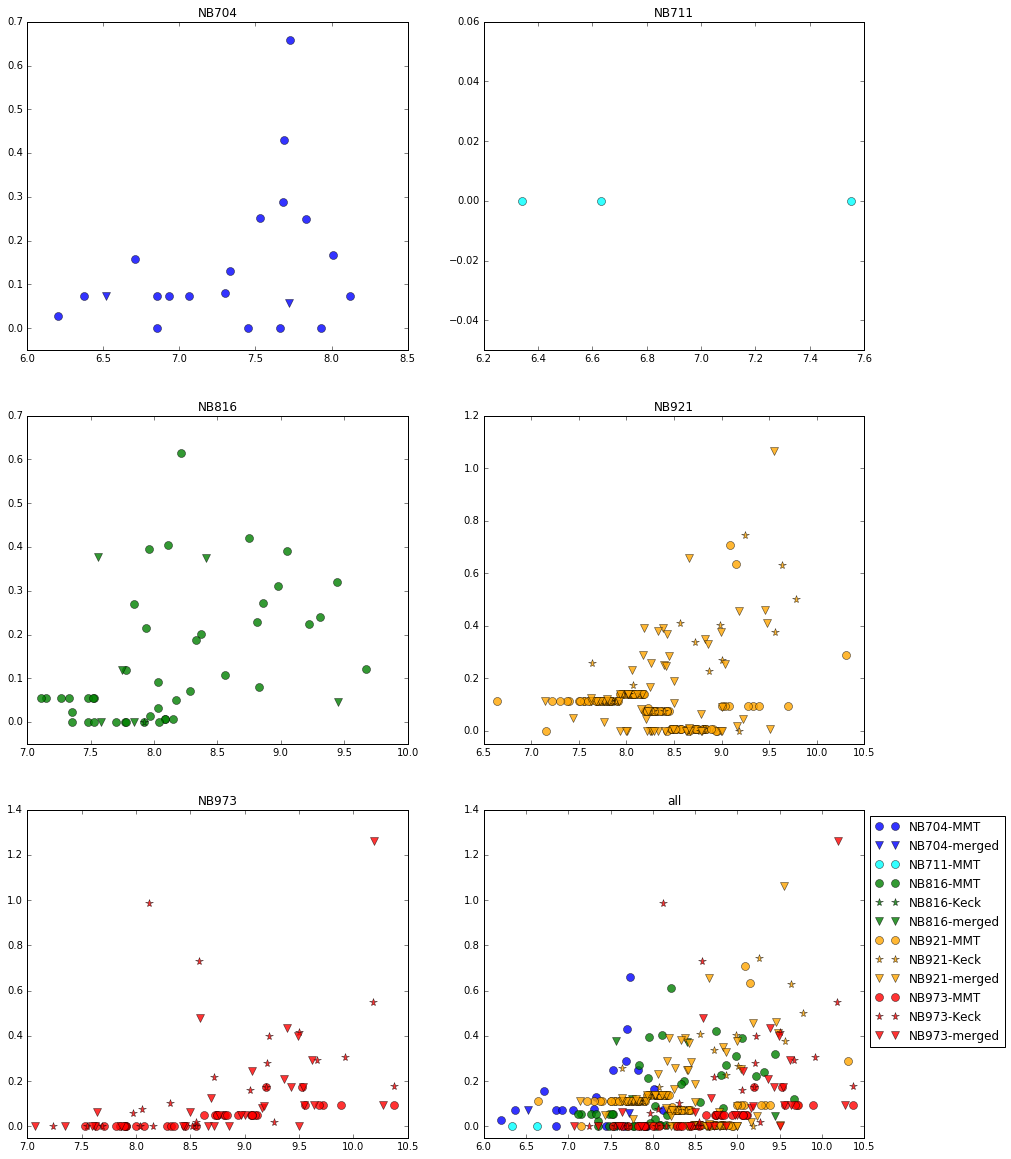

In [10]:
f, axes = plt.subplots(3,2)
axarr = np.ndarray.flatten(axes)
for ax, ff, cc in zip(axarr, ['NB704','NB711','NB816','NB921','NB973'], ['blue','cyan','green','orange','red']):
    yz_fmatch = np.where((corr_tbl['filt']==ff) & (corr_tbl['zspec0'] > 0) & (corr_tbl['zspec0'] < 9))[0]
    for inst, shape in zip(['MMT','Keck','merged'], ['o','*','v']):
        inst_match = np.array([x for x in range(len(yz_fmatch)) if inst in corr_tbl['inst_str0'][yz_fmatch][x]])

        if len(inst_match) > 0:
            mstar = corr_tbl['stlr_mass'][yz_fmatch[inst_match]]
            ebv00 = corr_tbl['EBV'][yz_fmatch[inst_match]]
            ax.plot(mstar, ebv00, color=cc, marker=shape, lw=0, markersize=8, alpha=0.8)
            
    ax.set_title(ff)
    ax.set_ylim(ymin=-0.05)

ax = axarr[5]
for ff, cc in zip(['NB704','NB711','NB816','NB921','NB973'], ['blue','cyan','green','orange','red']):
    yz_fmatch = np.where((corr_tbl['filt']==ff) & (corr_tbl['zspec0'] > 0) & (corr_tbl['zspec0'] < 9))[0]
    for inst, shape in zip(['MMT','Keck','merged'], ['o','*','v']):
        inst_match = np.array([x for x in range(len(yz_fmatch)) if inst in corr_tbl['inst_str0'][yz_fmatch][x]])

        if len(inst_match) > 0:
            mstar = corr_tbl['stlr_mass'][yz_fmatch[inst_match]]
            ebv00 = corr_tbl['EBV'][yz_fmatch[inst_match]]
            ax.plot(mstar, ebv00, color=cc, marker=shape, lw=0, markersize=8, alpha=0.8, label=ff+'-'+inst)

    ax.set_title('all')

ax.set_ylim([-0.05, 1.4])
ax.legend(loc='upper left', bbox_to_anchor=(1.0,1.0))
f.set_size_inches(15,20)